In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [11]:
data=pd.read_csv('avocado.csv')  # read the data
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(18249, 14)
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year   

In [13]:
#first drop Unnamed: 0 column then remove duplicates & recheck the size
data=data.drop(columns=["Unnamed: 0"],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(18249, 13)


In [14]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2016-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,SanDiego
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [15]:
print(data['year'].value_counts())

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


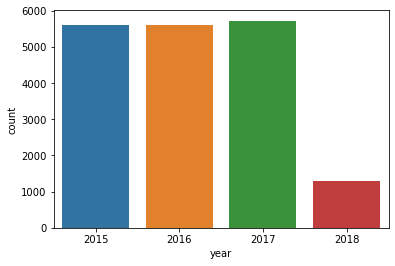

In [16]:
#plot each class frequency
sns.countplot(x='year',data=data)
plt.show()

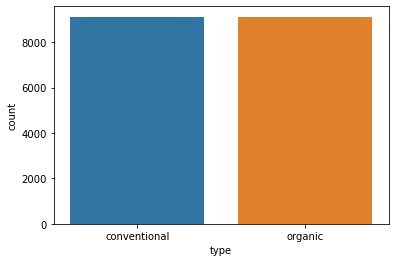

In [17]:
sns.countplot(x='type',data=data)
plt.show()

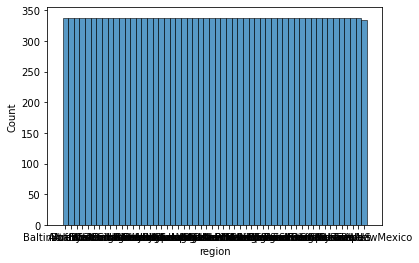

In [18]:
sns.histplot(x='region',data=data)
plt.show()

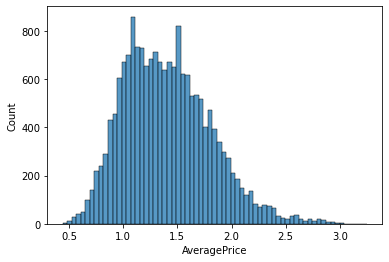

In [19]:
sns.histplot(x='AveragePrice',data=data)
plt.show()

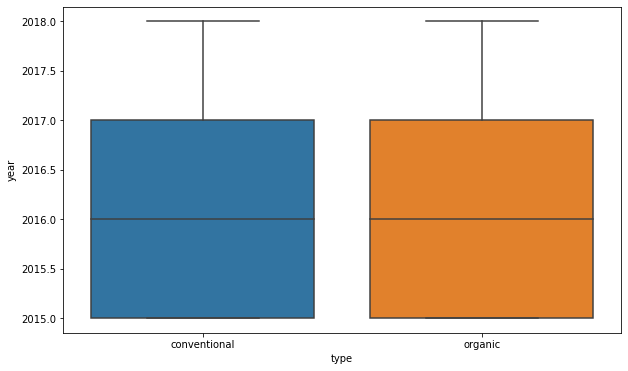

In [20]:
# Bivariant Graph in between type and year 
plt.figure(figsize =(10, 6))
sns.boxplot(y ='year', x ='type', data = data)
plt.show()

In [21]:
# finding the how much type of avocoda is sell in a year 
print(data.groupby("year")['type'].value_counts())

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64


In [22]:
# Lets seprate the date column by month & day to visualize the data better
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

#as we seprated the day month & year we delete date column
data=data.drop(columns=["Date"],axis=1)
data.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


In [23]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
df=label.fit_transform(data["type"]) 
pd.Series(df)
data["type"]=df

In [24]:
data1=data.drop(columns='region')

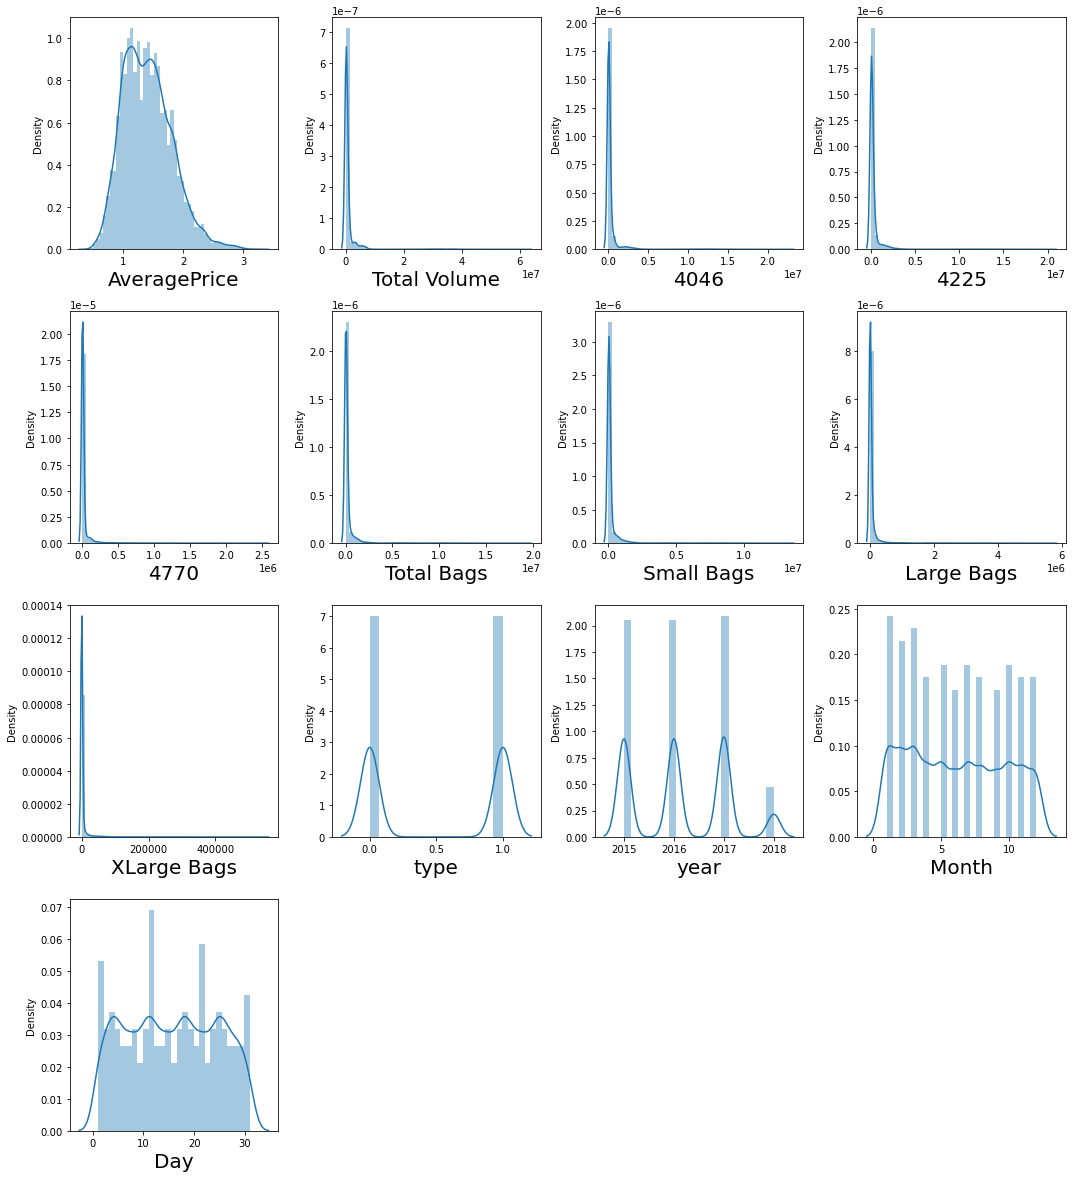

In [25]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [26]:
from sklearn.preprocessing import PowerTransformer

fetures=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [27]:
data[fetures]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849
...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849


In [28]:
data.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,Albany,12,27
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,Albany,12,20
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,2015,Albany,12,13


In [29]:
data1=data.drop(columns='region')
data1.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,12,27
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,12,20


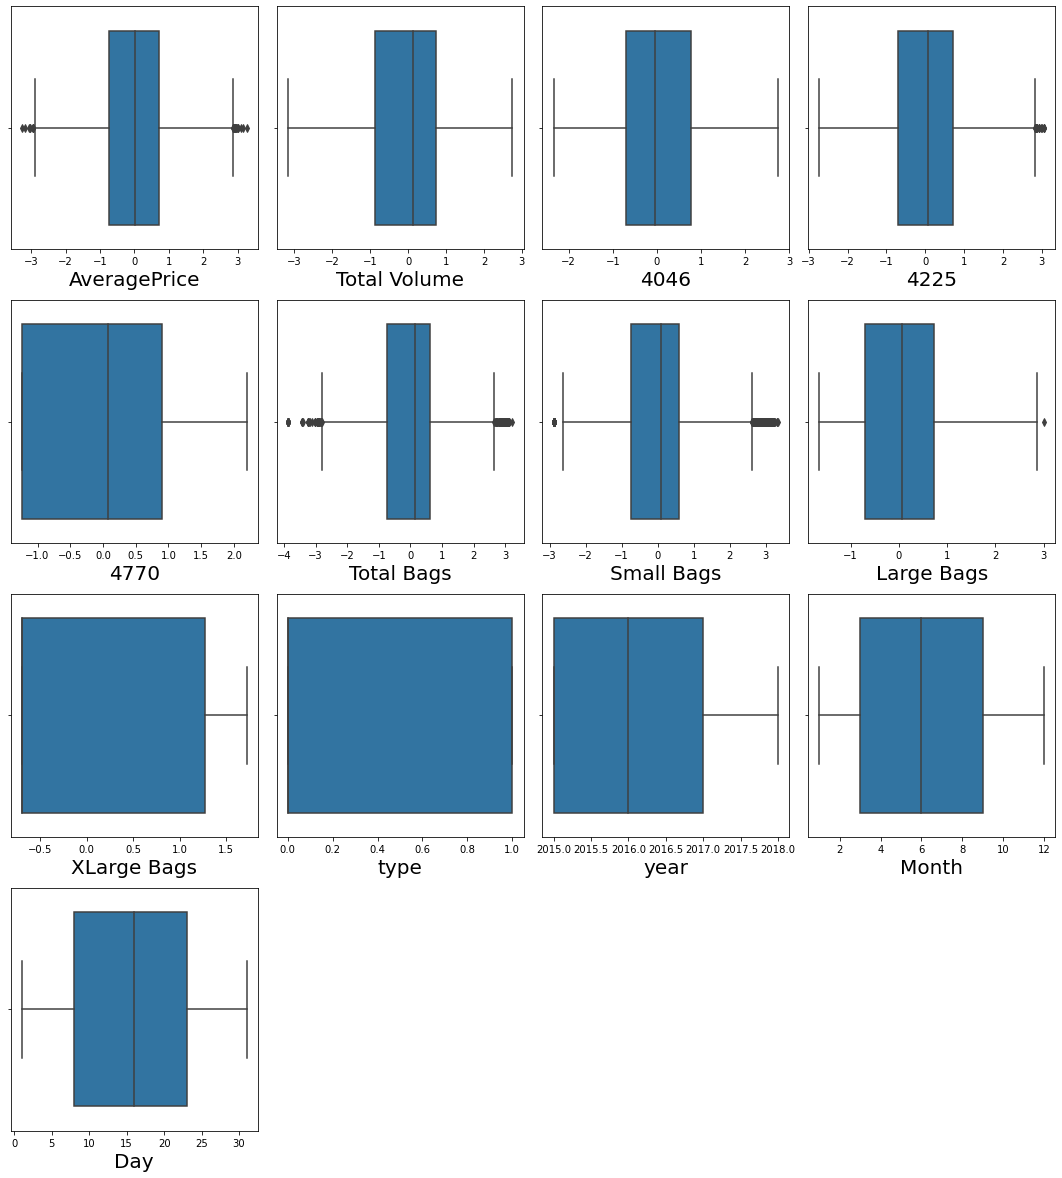

In [30]:
# distribusion after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns by using Zscore
z_score=zscore(data1)
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data1=data1[filtering_entry]

In [32]:
data.tail(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1,2018,WestTexNewMexico,1,21
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1,2018,WestTexNewMexico,1,14
18248,0.618287,-0.663809,-0.367908,-0.785173,0.122919,-0.384961,-0.212590,-1.042250,-0.699849,1,2018,WestTexNewMexico,1,7


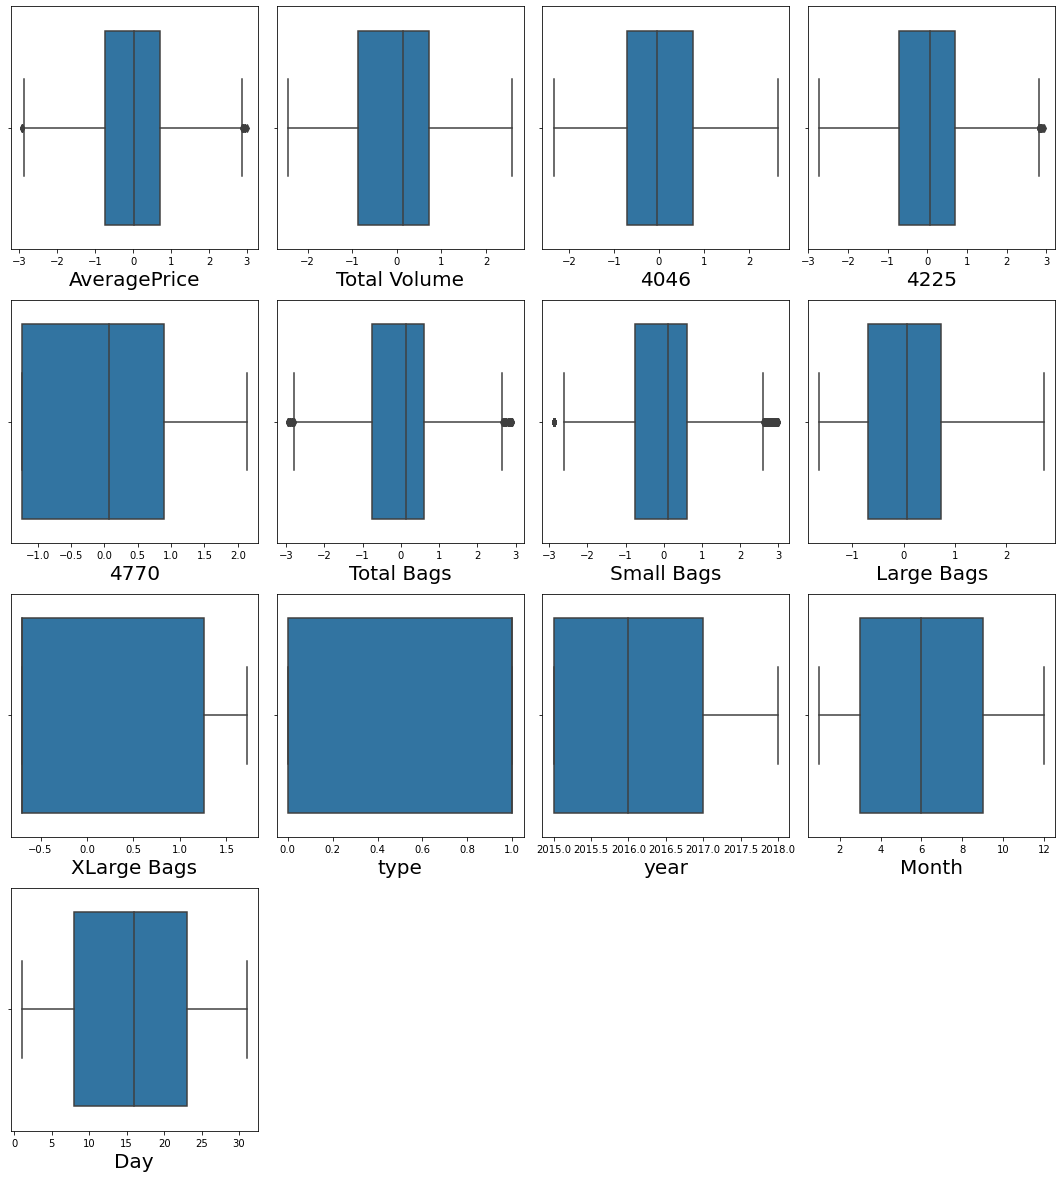

In [33]:
# Distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
data1.shape # after removing outliers

(18141, 13)

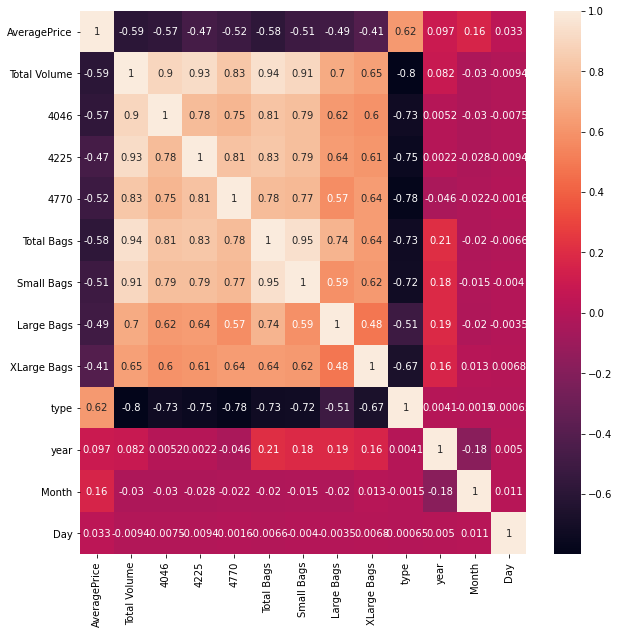

In [35]:
# Now data looks great lets check multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [36]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data1.drop(columns=['AveragePrice'])
y=data1['AveragePrice']

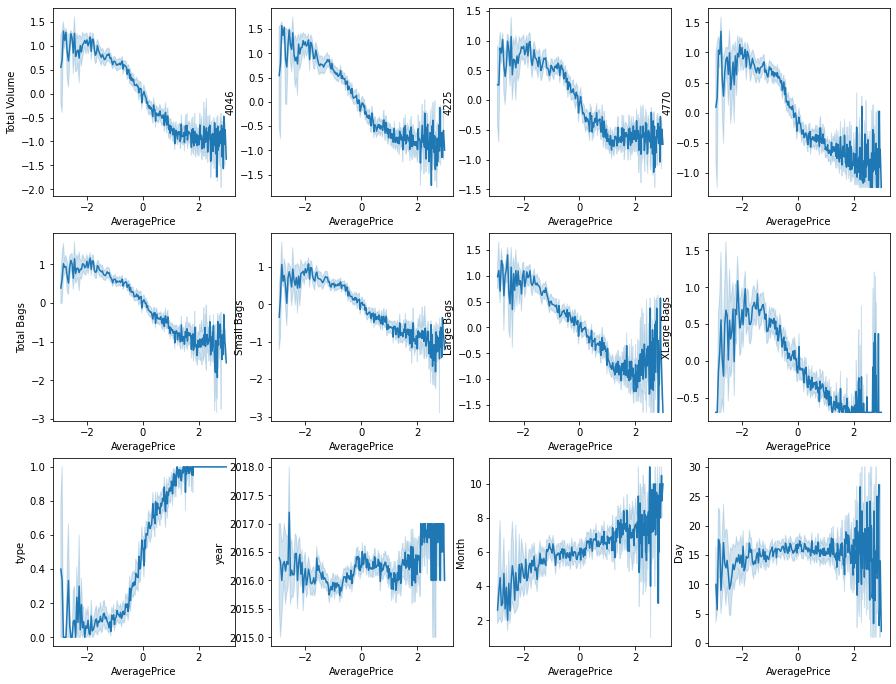

In [37]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [38]:
#Frist convert object type data into int by GetDummies encoding tech.for region & month
df=pd.get_dummies(data["region"],drop_first=True)
df.head()

,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data1=data1.join(df)
data1.shape

(18141, 66)

In [40]:
df=pd.get_dummies(data["Month"],drop_first=True)
df.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0


In [41]:
data1=data1.join(df) # join to orignal data set & check the shape
data1.shape

(18141, 77)

In [42]:
data1.columns # check the columns names

Index([       'AveragePrice',        'Total Volume',                '4046',
                      '4225',                '4770',          'Total Bags',
                'Small Bags',          'Large Bags',         'XLarge Bags',
                      'type',                'year',               'Month',
                       'Day',             'Atlanta', 'BaltimoreWashington',
                     'Boise',              'Boston',    'BuffaloRochester',
                'California',           'Charlotte',             'Chicago',
          'CincinnatiDayton',            'Columbus',       'DallasFtWorth',
                    'Denver',             'Detroit',         'GrandRapids',
                'GreatLakes',  'HarrisburgScranton', 'HartfordSpringfield',
                   'Houston',        'Indianapolis',        'Jacksonville',
                  'LasVegas',          'LosAngeles',          'Louisville',
         'MiamiFtLauderdale',            'Midsouth',           'Nashville',
          'N

In [43]:
# Lets Separate the data for further steps
x=data1.drop(columns=['AveragePrice','Month'])
y=data1['AveragePrice']

In [44]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)
x_scaled

array([[-0.07965399, -0.65640948,  0.32048989, ..., -0.3011032 ,
        -0.28940715,  3.45935245],
       [-0.14954635, -0.77581907,  0.24389593, ..., -0.3011032 ,
        -0.28940715,  3.45935245],
       [ 0.18916999, -0.7304558 ,  0.59602006, ..., -0.3011032 ,
        -0.28940715,  3.45935245],
       ...,
       [-0.7720027 , -0.61724153, -0.77256849, ..., -0.3011032 ,
        -0.28940715, -0.28907144],
       [-0.69777597, -0.54701063, -0.7098553 , ..., -0.3011032 ,
        -0.28940715, -0.28907144],
       [-0.66313547, -0.36284934, -0.78540091, ..., -0.3011032 ,
        -0.28940715, -0.28907144]])

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
vif

,vif,featurs
0,77.084022,Total Volume
1,17.175919,4046
2,17.922929,4225
3,6.980257,4770
4,46.082653,Total Bags
...,...,...
70,1.653865,8
71,1.589926,9
72,1.666757,10
73,1.644313,11


In [46]:
d=vif['vif']
for i in d:
    if i>10:
        print(i)

77.08402209348195
17.175918909570385
17.92292931569552
46.08265273350747
23.198681656363892
32.03979330545489


In [47]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=35)

# Average Price Prediction Models

In [48]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [49]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [50]:
# Model no.1
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

lcv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=False)
model_accuracy(Lasso_reg)

5.382555121314222e-06
Train Report: 0.7687300552005231
Test Report: 0.7479926768598845
RMSE: 0.4907299131801783
MAE: 0.38183813144456863
MSE: 0.24081584768982534
Accuracy: 76.48 %
Standard Deviation: 0.09 %


In [51]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.9841784778403591
Test Report: 0.8849327247486345
RMSE: 0.33159797206118824
MAE: 0.24049923303317897
MSE: 0.10995721507509257
Accuracy: 84.96 %
Standard Deviation: 0.20 %


In [52]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9593454070514659
Test Report: 0.896962619568398
RMSE: 0.31378585019096616
MAE: 0.2350397293761748
MSE: 0.09846155978006747
Accuracy: 88.36 %
Standard Deviation: 0.17 %


In [53]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.7506816893109631
Test Report: 0.717257542791559
RMSE: 0.5197942430996962
MAE: 0.40681552974301277
MSE: 0.2701860551595861
Accuracy: 73.83 %
Standard Deviation: 0.11 %


In [54]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.7627949301799377
RMSE: 0.4760997295397751
MAE: 0.325126564281101
MSE: 0.226670952467847
Accuracy: 68.35 %
Standard Deviation: 0.64 %


In [55]:
#Model no.6
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9763954263716484
Test Report: 0.8666054912343732
RMSE: 0.3570301786901715
MAE: 0.25793299543154236
MSE: 0.1274705484955358
Accuracy: 82.83 %
Standard Deviation: 0.60 %


In [56]:
# Hyper tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.25,0.1],'n_estimators':[20,50,70]}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=2)
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 70}

In [62]:
xgb=XGBRegressor(learning_rate= 0.20, max_depth=10,n_estimators=100)
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9920009001022518
Test Report: 0.9125920602560167
RMSE: 0.2890090172023428
MAE: 0.2120772019418092
MSE: 0.08352621202426407
Accuracy: 88.62 %
Standard Deviation: 0.15 %


In [63]:
# Hyper tuning by using RandomizedSearchCV With Bagging
from sklearn.model_selection import RandomizedSearchCV

dt=DecisionTreeRegressor()
para={'n_estimators':range(0,100,4),'random_state':[40,60,20]}
rand=RandomizedSearchCV(estimator=bb, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 60, 'n_estimators': 84}

In [64]:
bb=BaggingRegressor(n_estimators=84, random_state=60)

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9843210041351886
Test Report: 0.8843777119920841
RMSE: 0.3323967209360243
MAE: 0.24191859778929384
MSE: 0.11048758008902122
Accuracy: 84.87 %
Standard Deviation: 0.31 %


# after creating diffrent models and based on Kfold cross-validation , accuracy score i am selecting XGBRegressor with GridSearchCV hypertune parameter is the best model for the Average Price Prediction

In [ ]:
#save model
import pickle
Filename='Finalized_model1.pickle'
pickle.dump(svc,open(Filename,'wb'))

# Now lets Build the model for to predict region 

In [65]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,Albany,12,27
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,Albany,12,20
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,2015,Albany,12,13
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,2015,Albany,12,6
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,2015,Albany,11,29


In [66]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
df=label.fit_transform(data["region"]) 
pd.Series(df)
data["region"]=df

In [67]:
data.tail() # check again 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1,2018,53,2,4
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1,2018,53,1,28
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1,2018,53,1,21
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1,2018,53,1,14
18248,0.618287,-0.663809,-0.367908,-0.785173,0.122919,-0.384961,-0.212590,-1.042250,-0.699849,1,2018,53,1,7


In [68]:
print(data['region'].value_counts(ascending= True)) # check the data is imbalanced or not 

53    335
0     338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
23    338
11    338
43    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
27    338
7     338
38    338
22    338
16    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
31    338
47    338
Name: region, dtype: int64


In [69]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['region'])
y=data['region']

In [70]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_train)
    pred=rfc.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 1.0
at random sate 0, the testing accuracy is:- 0.9090510628972167


at random sate 1, the training accuracy is:- 1.0
at random sate 1, the testing accuracy is:- 0.9114617576156038


at random sate 2, the training accuracy is:- 1.0
at random sate 2, the testing accuracy is:- 0.9129958360727591


at random sate 3, the training accuracy is:- 1.0
at random sate 3, the testing accuracy is:- 0.9077361385053693


at random sate 4, the training accuracy is:- 1.0
at random sate 4, the testing accuracy is:- 0.9110234494849879


at random sate 5, the training accuracy is:- 1.0
at random sate 5, the testing accuracy is:- 0.9123383738768354


at random sate 6, the training accuracy is:- 1.0
at random sate 6, the testing accuracy is:- 0.9156256848564541


at random sate 7, the training accuracy is:- 1.0
at random sate 7, the testing accuracy is:- 0.9077361385053693


at random sate 8, the training accuracy is:- 1.0
at random sate 8, the testing accuracy 

at random sate 71, the training accuracy is:- 1.0
at random sate 71, the testing accuracy is:- 0.9077361385053693


at random sate 72, the training accuracy is:- 1.0
at random sate 72, the testing accuracy is:- 0.9123383738768354


at random sate 73, the training accuracy is:- 1.0
at random sate 73, the testing accuracy is:- 0.9077361385053693


at random sate 74, the training accuracy is:- 1.0
at random sate 74, the testing accuracy is:- 0.908612754766601


at random sate 75, the training accuracy is:- 1.0
at random sate 75, the testing accuracy is:- 0.9101468332237563


at random sate 76, the training accuracy is:- 1.0
at random sate 76, the testing accuracy is:- 0.9002849002849003


at random sate 77, the training accuracy is:- 1.0
at random sate 77, the testing accuracy is:- 0.9099276791584484


at random sate 78, the training accuracy is:- 1.0
at random sate 78, the testing accuracy is:- 0.9145299145299145


at random sate 79, the training accuracy is:- 1.0
at random sate 79, the 

In [71]:
#Split data into train & test by using this new fetures
x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=66)

In [72]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [73]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [74]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.5619611281601636
Test Report: 0.5555555555555556
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.55      0.56        78
           1       0.25      0.38      0.30        82
           2       0.81      0.71      0.76        94
           3       0.51      0.36      0.42        80
           4       0.51      0.54      0.52        82
           5       0.47      0.54      0.51        79
           6       0.85      0.89      0.87        92
           7       0.53      0.62      0.57        78
           8       0.73      0.80      0.77        96
           9       0.57      0.77      0.65        91
          10       0.55      0.47      0.51        94
          11       0.61      0.74      0.67        85
          12       0.51      0.51      0.51        81
          13       0.33      0.26      0.29        80
          14       0.61      0.60      0.60        85
          15       0.71      0.57      0.63    

In [75]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.9211045364891519
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.92      0.87        78
           1       0.90      0.88      0.89        82
           2       0.98      0.97      0.97        94
           3       0.96      0.89      0.92        80
           4       0.91      0.98      0.94        82
           5       0.93      0.86      0.89        79
           6       0.99      1.00      0.99        92
           7       0.92      0.90      0.91        78
           8       0.98      1.00      0.99        96
           9       0.89      0.93      0.91        91
          10       0.89      0.93      0.91        94
          11       0.91      0.94      0.92        85
          12       1.00      0.96      0.98        81
          13       0.86      0.86      0.86        80
          14       0.90      0.92      0.91        85
          15       0.97      0.98      0.97        89
        

In [76]:
#Model no.3
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_ns,y_train_ns)

print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(knn)

Train Report: 0.8112669881630864
Test Report: 0.6419022572868727
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.85      0.68        78
           1       0.33      0.51      0.40        82
           2       0.70      0.86      0.78        94
           3       0.61      0.78      0.68        80
           4       0.76      0.79      0.78        82
           5       0.51      0.59      0.55        79
           6       0.85      0.77      0.81        92
           7       0.46      0.63      0.53        78
           8       0.77      0.76      0.76        96
           9       0.47      0.60      0.53        91
          10       0.40      0.52      0.45        94
          11       0.62      0.78      0.69        85
          12       0.84      0.78      0.81        81
          13       0.54      0.49      0.51        80
          14       0.77      0.81      0.79        85
          15       0.77      0.84      0.80    

In [77]:
#Model no.4
from sklearn.ensemble import GradientBoostingClassifier

gbdt=GradientBoostingClassifier()

gbdt.fit(x_train_ns,y_train_ns)

print_score(gbdt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(gbdt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.9839251790150518
Test Report: 0.8312513697129081
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.84        78
           1       0.77      0.68      0.72        82
           2       0.94      0.94      0.94        94
           3       0.87      0.81      0.84        80
           4       0.87      0.80      0.84        82
           5       0.74      0.77      0.76        79
           6       0.99      0.92      0.96        92
           7       0.85      0.87      0.86        78
           8       0.94      0.93      0.93        96
           9       0.87      0.81      0.84        91
          10       0.70      0.81      0.75        94
          11       0.88      0.88      0.88        85
          12       0.95      0.86      0.90        81
          13       0.78      0.78      0.78        80
          14       0.84      0.82      0.83        85
          15       0.95      0.94      0.95    

# Best Model to predic the region is RandomForestClassifier with 87% accuracy

In [ ]:
#save model
import pickle
Filename='Finalized_model.pickle'
pickle.dump(svc,open(Filename,'wb'))